In [2]:
import cross_validation0 as My_KNN
import sklearn.datasets as sk_d
import numpy as np
import time as t
batch = sk_d.fetch_mldata("MNIST original")

In [3]:
X_train = batch.data[0:60000, :].astype(int)
X_test = batch.data[60000:, :].astype(int)
Y_train = batch.target[0:60000]
Y_test = batch.target[60000:]

# Experiement 1


In [3]:
feature_size = [10, 20, 100]
classifier = {'my_own':My_KNN.KNNClassifier(k=5, strategy='my_own',metric='euclidean',weights=False,test_block_size=1001)}
classifier['brute'] = My_KNN.KNNClassifier(k=5, strategy='brute',metric='euclidean',weights=False,test_block_size=1000)
classifier['kd_tree'] = My_KNN.KNNClassifier(k=5, strategy='kd_tree',metric='euclidean',weights=False,test_block_size=1000)
classifier['ball_tree'] = My_KNN.KNNClassifier(k=5, strategy='ball_tree',metric='euclidean',weights=False,test_block_size=1000)
res = {}
for c in classifier.keys():
    res[c] = []
for s in feature_size:
    features = np.random.randint(0,784,s)
    for c in classifier.keys():
        classifier[c].fit(X_train[:,features],Y_train)
        t_start = t.time()
        classifier[c].find_kneighbors(X_test[:,features],return_distance=False)
        (res[c]).append(t.time() - t_start)
print(res)

{'my_own': [51.48769021034241, 57.1014244556427, 272.1426315307617], 'brute': [14.72292685508728, 15.269999504089355, 17.089237689971924], 'kd_tree': [0.609086275100708, 2.611332654953003, 120.50178098678589], 'ball_tree': [2.7553610801696777, 14.39988660812378, 136.36785554885864]}


# Experiement 2


In [20]:
kf = My_KNN.kfold(X_train.shape[0], 3)
t_start = t.time()
res_1_10 = My_KNN.knn_cross_val_score(X_train,Y_train,list(range(1,11)),cv=kf, strategy='brute',metric='euclidean')
t_end_ecl = t.time() -  t_start
print('time on euclidean metric: ',t_end_ecl)
print('accuracy without weights and euclidean metric')
for i in res_1_10.keys():
    print('k = ', i,' : ',str(res_1_10[i]),' max= ',str(max(res_1_10[i]))," mean= ",str(np.mean(res_1_10[i])))
t_start = t.time()
res_1_10 = My_KNN.knn_cross_val_score(X_train,Y_train,list(range(1,11)),cv=kf, strategy='brute',metric='cosine')
t_end_cos = t.time() - t_start 
print('time on euclidean metric: ',t_end_cos)
print('accuracy without weights and cosine metric')
for i in res_1_10.keys():
    print('k = ', i,' : ',str(res_1_10[i]),' max= ',str(max(res_1_10[i]))," mean= ",str(np.mean(res_1_10[i])))

time on euclidean metric:  123.26715445518494
accuracy without weights and euclidean metric
k =  1  :  [0.97109999999999996, 0.96865000000000001, 0.97019999999999995]  max=  0.9711  mean=  0.969983333333
k =  2  :  [0.96499999999999997, 0.96340000000000003, 0.96314999999999995]  max=  0.965  mean=  0.96385
k =  3  :  [0.97075, 0.97055000000000002, 0.96855000000000002]  max=  0.97075  mean=  0.96995
k =  4  :  [0.96950000000000003, 0.96879999999999999, 0.96704999999999997]  max=  0.9695  mean=  0.96845
k =  5  :  [0.96930000000000005, 0.96970000000000001, 0.96755000000000002]  max=  0.9697  mean=  0.96885
k =  6  :  [0.96850000000000003, 0.96840000000000004, 0.96484999999999999]  max=  0.9685  mean=  0.96725
k =  7  :  [0.96875, 0.96735000000000004, 0.96455000000000002]  max=  0.96875  mean=  0.966883333333
k =  8  :  [0.96714999999999995, 0.96650000000000003, 0.96340000000000003]  max=  0.96715  mean=  0.965683333333
k =  9  :  [0.96589999999999998, 0.96494999999999997, 0.9634000000000

# Experiement 3


In [21]:
kf = My_KNN.kfold(X_train.shape[0], 3)
t_start = t.time()
res_1_10 = My_KNN.knn_cross_val_score(X_train,Y_train,list(range(1,11)),cv=kf, strategy='brute',metric='euclidean', weights=True)
t_end_ecl = t.time() -  t_start
print('time on euclidean metric with weights: ',t_end_ecl)
print('accuracy with weights')
for i in res_1_10.keys():
    print('k = ', i,' : ',str(res_1_10[i]),' max= ',str(max(res_1_10[i]))," mean= ",str(np.mean(res_1_10[i])))
t_start = t.time()
res_1_10 = My_KNN.knn_cross_val_score(X_train,Y_train,list(range(1,11)),cv=kf, strategy='brute',metric='cosine',weights=True)
t_end_cos = t.time() - t_start 
print('time on euclidean metric with weights: ',t_end_cos)
print('accuracy with weights')
for i in res_1_10.keys():
    print('k = ', i,' : ',str(res_1_10[i]),' max= ',str(max(res_1_10[i]))," mean= ",str(np.mean(res_1_10[i])))

time on euclidean metric with weights:  122.96211290359497
accuracy with weights
k =  1  :  [0.96889999999999998, 0.97004999999999997, 0.96955000000000002]  max=  0.97005  mean=  0.9695
k =  2  :  [0.96889999999999998, 0.97004999999999997, 0.96955000000000002]  max=  0.97005  mean=  0.9695
k =  3  :  [0.97130000000000005, 0.97130000000000005, 0.97104999999999997]  max=  0.9713  mean=  0.971216666667
k =  4  :  [0.97240000000000004, 0.97209999999999996, 0.97060000000000002]  max=  0.9724  mean=  0.9717
k =  5  :  [0.97094999999999998, 0.97009999999999996, 0.96989999999999998]  max=  0.97095  mean=  0.970316666667
k =  6  :  [0.97094999999999998, 0.97114999999999996, 0.96924999999999994]  max=  0.97115  mean=  0.97045
k =  7  :  [0.96914999999999996, 0.96875, 0.96850000000000003]  max=  0.96915  mean=  0.9688
k =  8  :  [0.96914999999999996, 0.96955000000000002, 0.96904999999999997]  max=  0.96955  mean=  0.96925
k =  9  :  [0.96714999999999995, 0.96725000000000005, 0.96655000000000002] 

# Experiement 4

In [50]:

best_alg = My_KNN.KNNClassifier(k=4, strategy='brute', metric='cosine',weights=True, test_block_size=1000)
best_alg.fit(X_train, Y_train)
Y_pred = best_alg.predict(X_test)
print("accuracy on test:\n", My_KNN.acc_scorer(Y_test,Y_pred))

accuracy on test:
 0.9752


In [51]:
from sklearn.metrics import confusion_matrix as cm
import plot_confusion_matrix as pcm
import matplotlib.pyplot as plt
my_cm = cm(Y_test, Y_pred)

Confusion matrix, without normalization
[[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1129    3    1    0    0    2    0    0    0]
 [   8    0 1009    1    1    0    0    8    5    0]
 [   0    1    3  976    1   12    0    4    9    4]
 [   2    1    0    0  946    0    6    2    0   25]
 [   4    0    0    9    1  863    7    1    4    3]
 [   3    3    0    0    1    3  948    0    0    0]
 [   2   10    4    0    1    0    0  998    0   13]
 [   7    1    2    9    3    3    5    4  936    4]
 [   7    7    2    5    7    3    1    4    3  970]]


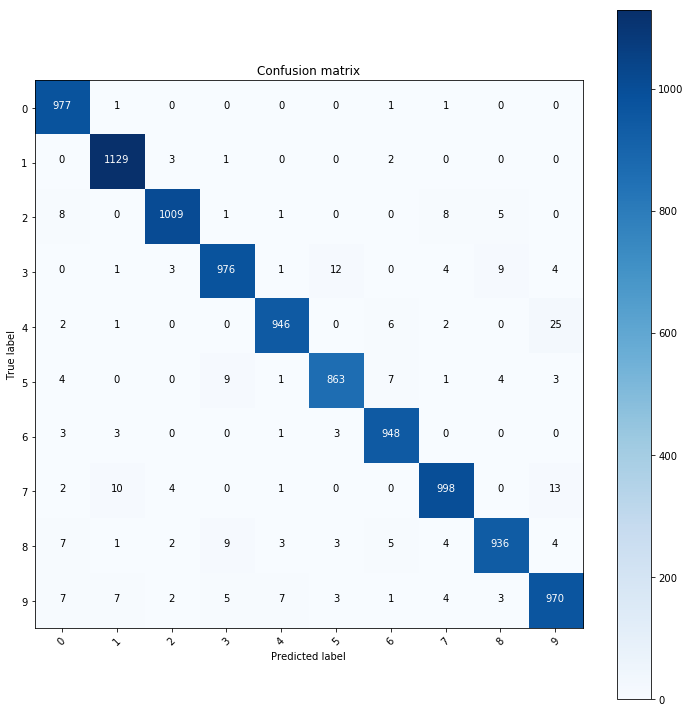

In [52]:
plt.figure(figsize=(10,10))
pcm.plot_confusion_matrix(my_cm,np.unique(Y_test).astype(int))
plt.savefig("cm4.pdf")

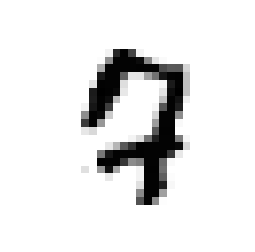

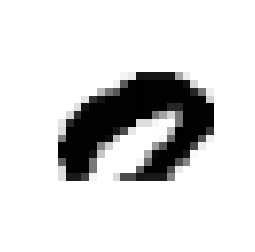

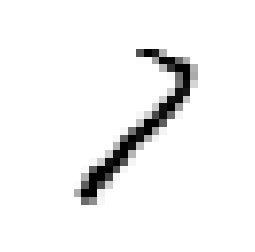

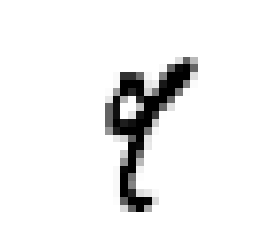

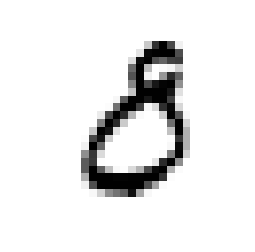

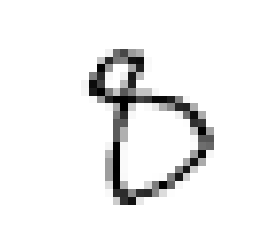

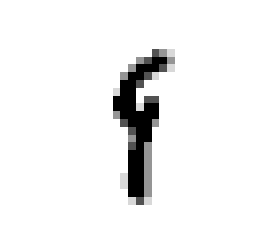

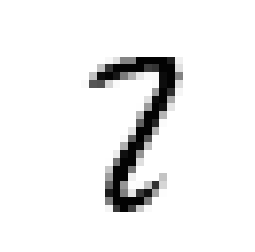

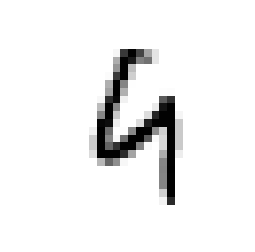

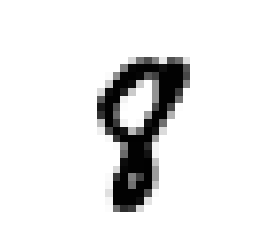

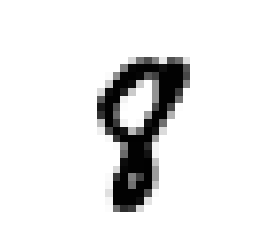

In [35]:
import scipy.misc as sc
%matplotlib inline
X_fault = (Y_pred != Y_test)
ind = np.random.randint(0,X_test[X_fault,:].shape[0],10)
X_show = (X_test[X_fault,:])[ind,:]
for i in range(X_show.shape[0]):
    img = sc.toimage(X_show[i,:].reshape((28,28)))
    plt.imshow(img, cmap='Greys')
    plt.axis("off")
    plt.show()
    plt.imshow(img, cmap='Greys')
    plt.axis("off")
    plt.savefig("num" + str(i)+".pdf")

In [36]:
Y_test_show = (Y_test[X_fault])[ind]
Y_pred_show = (Y_pred[X_fault])[ind]
print("True values:\n", Y_test_show)
print("Predicted values:\n", Y_pred_show)

True values:
 [ 7.  0.  7.  9.  8.  8.  9.  2.  9.  8.]
Predicted values:
 [ 9.  7.  1.  4.  0.  3.  1.  7.  4.  9.]


# Experiement 5

In [10]:
res = []
angles = [5,10,15]
cv = My_KNN.kfold(X_train.shape[0], 3)
for p in angles:
    res.append(My_KNN.knn_cross_val_score_for5(X_train,Y_train,p,cv,change='rotate', k=4, metric='cosine',strategy='brute', weights=True))
print("accuracy on data with rotations")


accuracy on data with rotations


In [11]:
for i in range(len(res)):
    print('angle = ',angles[i],"\n")
    print("acc: ",str(res[i])," max acc =",str(max(res[i]))," mean acc =",str(np.mean(res[i])),"\n")

angle =  5 

acc:  [0.97799999999999998, 0.97919999999999996, 0.97760000000000002]  max acc = 0.9792  mean acc = 0.978266666667 

angle =  10 

acc:  [0.97740000000000005, 0.97755000000000003, 0.97835000000000005]  max acc = 0.97835  mean acc = 0.977766666667 

angle =  15 

acc:  [0.97529999999999994, 0.97489999999999999, 0.97524999999999995]  max acc = 0.9753  mean acc = 0.97515 



In [12]:
res1 = []
shifts = [1, 2, 3]
for p in shifts:
    res1.append(My_KNN.knn_cross_val_score_for5(X_train,Y_train,p,cv,change='shift', k=4, metric='cosine', strategy='brute', weights=True))
print("accuracy on data with shifts:")

accuracy on data with shifts:


NameError: name 'shift' is not defined

In [14]:
for i in range(len(res1)):
    print('shift = ',shifts[i],"\n")
    print("acc: ",str(res1[i])," max acc =",str(max(res1[i]))," mean acc =",str(np.mean(res1[i])),"\n")

shift =  1 

acc:  [0.97430000000000005, 0.97435000000000005, 0.97524999999999995]  max acc = 0.97525  mean acc = 0.974633333333 

shift =  2 

acc:  [0.97394999999999998, 0.97399999999999998, 0.97319999999999995]  max acc = 0.974  mean acc = 0.973716666667 

shift =  3 

acc:  [0.97275, 0.9748, 0.97494999999999998]  max acc = 0.97495  mean acc = 0.974166666667 



In [15]:
res2 = []
disp = [0.5, 1, 1.5]
for p in disp:
    res2.append(My_KNN.knn_cross_val_score_for5(X_train,Y_train,p,cv,change='filter', k=4,strategy='brute', metric='cosine', weights=True))
for i in range(len(res2)):
    print('Dispersion for Gauss Filter = ',disp[i],"\n")
    print("acc: ",str(res2[i])," max acc =",str(max(res2[i]))," mean acc =",str(np.mean(res2[i])))

Dispersion for Gauss Filter =  0.5 

acc:  [0.97855000000000003, 0.97724999999999995, 0.97919999999999996]  max acc = 0.9792  mean acc = 0.978333333333
Dispersion for Gauss Filter =  1 

acc:  [0.9798, 0.97635000000000005, 0.97965000000000002]  max acc = 0.9798  mean acc = 0.9786
Dispersion for Gauss Filter =  1.5 

acc:  [0.97965000000000002, 0.9788, 0.97704999999999997]  max acc = 0.97965  mean acc = 0.9785


Confusion matrix, without normalization
[[  1   0   0   0   0   0   0   0  -1   0]
 [  0  -3   0   1   0   0   2   0   0   0]
 [  1  -2  -1   1   0   0  -1  -1   3   0]
 [  0   1   2 -11   0   5   0   0   3   0]
 [  1   1   0   0 -10   0   0   2   0   6]
 [  0   0   0   0   0  -4   2   0   3  -1]
 [  1   0   0   0  -1   2  -1   0  -1   0]
 [  2   2   0  -2   1   0   0  -8   0   5]
 [  4   1   0  -3  -1   2   2   1  -6   0]
 [  4   3   1  -2   1   1   0  -3  -1  -4]]
Confusion matrix, without normalization
[[  0   1   0   0   0   0  -1   0   0   0]
 [  0  -3   0   1   0   0   2   0   0   0]
 [  2  -2  -4   0   0   0   0   0   4   0]
 [ -1   1   2 -15   0   6   0   0   5   2]
 [  0   1   0   0 -10   0   1   2   0   6]
 [  1   0   0  -1   0  -5   1  -1   3   2]
 [  1   1   0   0   0   2  -4   0   0   0]
 [  2   0   0  -1   1   0   0  -7   0   5]
 [  5   1   0  -2   0   2   2   1 -10   1]
 [  3   3   0   1   2  -2   0  -1  -1  -5]]
Confusion matrix, without normalization
[[  2   1   0   0 

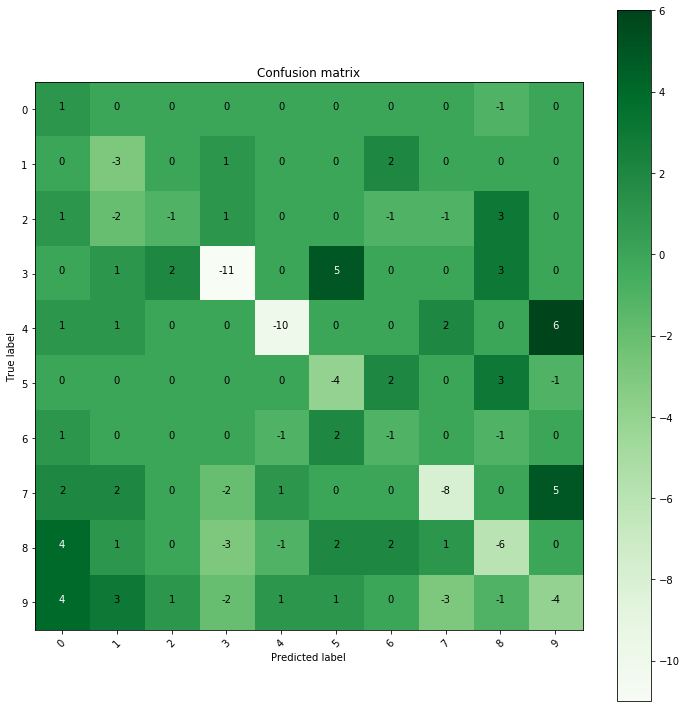

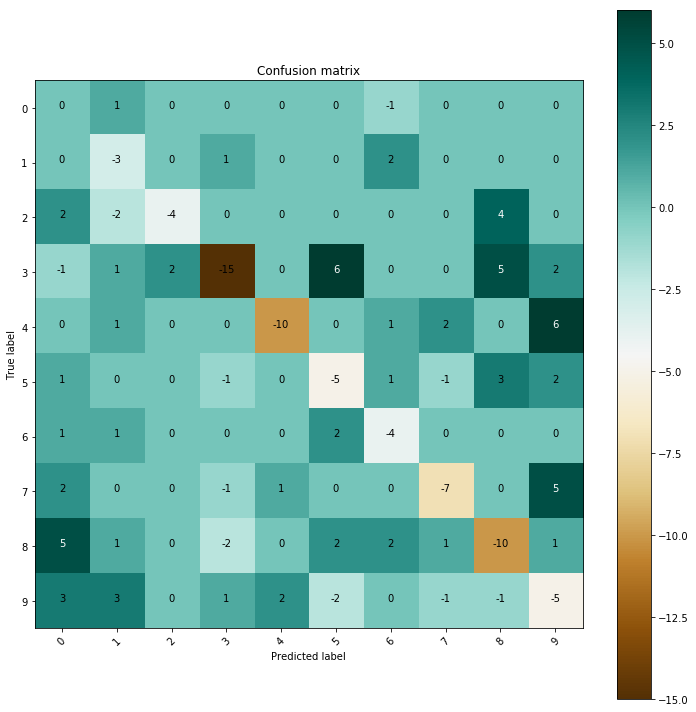

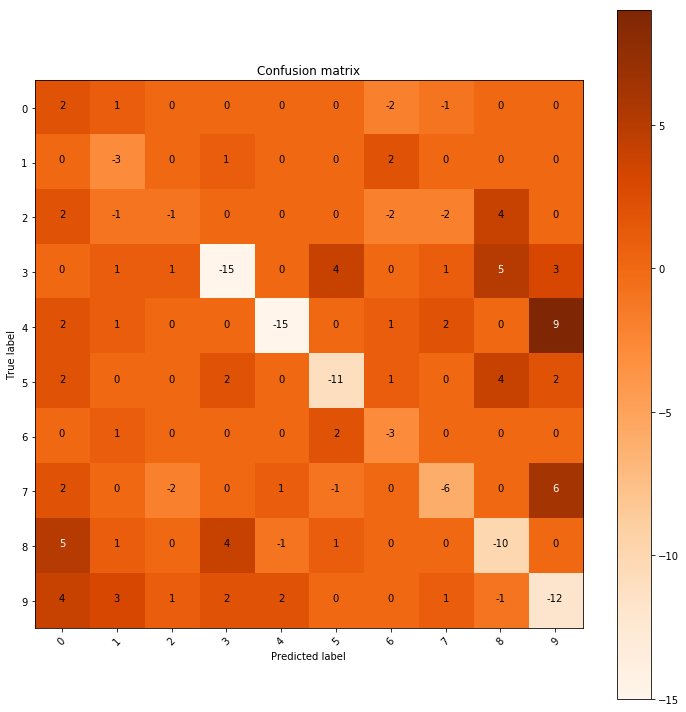

In [54]:
import skimage.transform as skt
import scipy.ndimage.interpolation as ndimage
import scipy.ndimage.filters as filt
import matplotlib.pyplot as plt
rotate = 5
shift = 1
disp = 1 ** (1/2)
cl = My_KNN.KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
cl.fit(X_train, Y_train)
knn_dist, knn_ind = cl.find_kneighbors(X_test, return_distance=True)
for p in [rotate, -rotate]:
    X_new = np.array([skt.rotate(im.reshape(28,28), p).ravel() for im in X_train])
    cl.fit(X_new, Y_train)
    knn_dist_tmp, knn_ind_tmp = cl.find_kneighbors(X_test, return_distance=True)
    knn_ind [knn_dist > knn_dist_tmp] = knn_ind_tmp[knn_dist > knn_dist_tmp]
    knn_dist[knn_dist > knn_dist_tmp] = knn_dist_tmp[knn_dist > knn_dist_tmp]
    del(X_new)
    del(knn_ind_tmp)
    del(knn_dist_tmp)
Y_pred = cl.predict_k(Y_train[knn_ind], knn_dist)
my_cm_ar = cm(Y_test, Y_pred)
plt.figure(figsize=(10,10))
pcm.plot_confusion_matrix(my_cm-my_cm_ar,np.unique(Y_test).astype(int),cmap=plt.cm.Greens)
plt.savefig("cm5_ar.pdf")
for p in [shift, -shift]:
    X_new = np.array([ndimage.shift(im.reshape(28,28), [p, 0]).ravel() for im in X_train])
    cl.fit(X_new, Y_train)
    knn_dist_tmp, knn_ind_tmp = cl.find_kneighbors(X_test, return_distance=True)
    knn_ind [knn_dist > knn_dist_tmp] = knn_ind_tmp[knn_dist > knn_dist_tmp]
    knn_dist[knn_dist > knn_dist_tmp] = knn_dist_tmp[knn_dist > knn_dist_tmp]
    del(X_new)
    del(knn_ind_tmp)
    del(knn_dist_tmp)

for p in [shift, -shift]:
    X_new = np.array([ndimage.shift(im.reshape(28,28), [0, p]).ravel() for im in  X_train])
    cl.fit(X_new, Y_train)
    knn_dist_tmp, knn_ind_tmp = cl.find_kneighbors(X_test, return_distance=True)
    knn_ind [knn_dist > knn_dist_tmp] = knn_ind_tmp[knn_dist > knn_dist_tmp]
    knn_dist[knn_dist > knn_dist_tmp] = knn_dist_tmp[knn_dist > knn_dist_tmp]
    del(X_new)
    del(knn_ind_tmp)
    del(knn_dist_tmp)
Y_pred = cl.predict_k(Y_train[knn_ind], knn_dist)
my_cm_as = cm(Y_test, Y_pred)
plt.figure(figsize=(10,10))
pcm.plot_confusion_matrix(my_cm-my_cm_as,np.unique(Y_test).astype(int),cmap=plt.cm.BrBG)
plt.savefig("cm5_as.pdf")


X_new = np.array([filt.gaussian_filter(im.reshape(28,28), disp).ravel() for im in X_train])
cl.fit(X_new, Y_train)
knn_dist_tmp, knn_ind_tmp = cl.find_kneighbors(X_test,return_distance=True)
knn_ind [knn_dist > knn_dist_tmp] = knn_ind_tmp[knn_dist > knn_dist_tmp]
knn_dist[knn_dist > knn_dist_tmp] = knn_dist_tmp[knn_dist > knn_dist_tmp]
del(X_new)
del(knn_ind_tmp)
del(knn_dist_tmp)
Y_pred = cl.predict_k(Y_train[knn_ind], knn_dist)
my_cm_af = cm(Y_test, Y_pred)
plt.figure(figsize=(10,10))
pcm.plot_confusion_matrix(my_cm-my_cm_af,np.unique(Y_test).astype(int),cmap=plt.cm.Oranges)
plt.savefig("cm5_af.pdf")

total_acc = My_KNN.acc_scorer(Y_test, Y_pred)
print("Total accuracy:\n",total_acc)
my_cm1 = cm(Y_test, Y_pred)

Confusion matrix, without normalization
[[  2   1   0   0   0   0  -2  -1   0   0]
 [  0  -3   0   1   0   0   2   0   0   0]
 [  2  -1  -1   0   0   0  -2  -2   4   0]
 [  0   1   1 -15   0   4   0   1   5   3]
 [  2   1   0   0 -15   0   1   2   0   9]
 [  2   0   0   2   0 -11   1   0   4   2]
 [  0   1   0   0   0   2  -3   0   0   0]
 [  2   0  -2   0   1  -1   0  -6   0   6]
 [  5   1   0   4  -1   1   0   0 -10   0]
 [  4   3   1   2   2   0   0   1  -1 -12]]


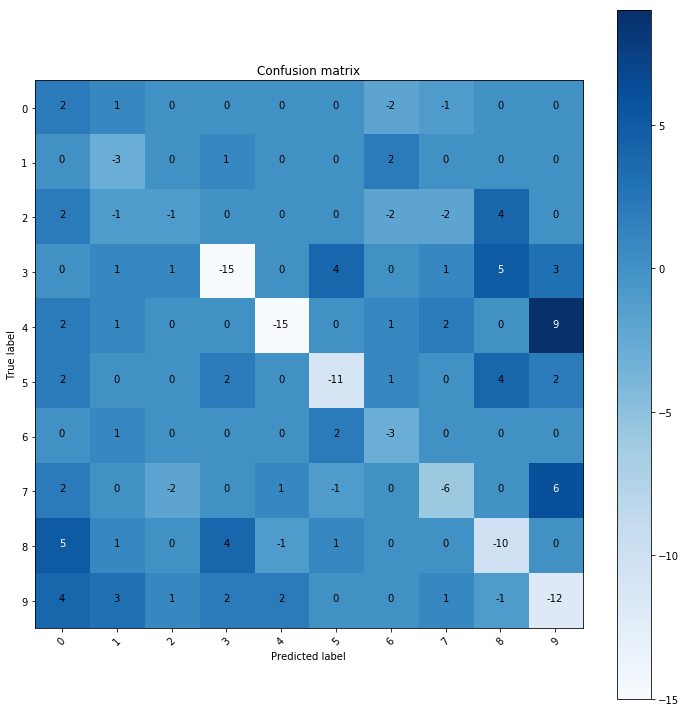

In [55]:
my_cm1 = cm(Y_test, Y_pred)
plt.figure(figsize=(10,10))
pcm.plot_confusion_matrix(my_cm - my_cm1,np.unique(Y_test).astype(int))
plt.savefig("cm5_a_all.pdf")

# Experiement 6


In [47]:
res = []
angles = [5,10,15]
cv = My_KNN.kfold(X_train.shape[0], 3)
for p in angles:
    res.append(My_KNN.knn_cross_val_score_for6(X_train,Y_train,p,cv,change='rotate', k=4, metric='cosine',strategy='brute', weights=True))
print("accuracy on data with rotations for test data")

accuracy on data with rotations for test data


In [48]:
for i in range(len(res)):
    print('angle = ',angles[i],"\n")
    print("acc: ",str(res[i])," max acc =",str(max(res[i]))," mean acc =",str(np.mean(res[i])),"\n")

angle =  5 

acc:  [0.97484999999999999, 0.97399999999999998, 0.97545000000000004]  max acc = 0.97545  mean acc = 0.974766666667 

angle =  10 

acc:  [0.97350000000000003, 0.97409999999999997, 0.97484999999999999]  max acc = 0.97485  mean acc = 0.97415 

angle =  15 

acc:  [0.97050000000000003, 0.97135000000000005, 0.97284999999999999]  max acc = 0.97285  mean acc = 0.971566666667 



In [8]:
res1 = []
shifts = [1, 2, 3]
for p in shifts:
    res1.append(My_KNN.knn_cross_val_score_for6(X_train,Y_train,p,cv,change='shift', k=4, metric='cosine', strategy='brute', weights=True))
print("accuracy on data with shifts for test data:")

accuracy on data with shifts for test data:


In [9]:
for i in range(len(res1)):
    print('shift = ',shifts[i],"\n")
    print("acc: ",str(res1[i])," max acc =",str(max(res1[i]))," mean acc =",str(np.mean(res1[i])),"\n")

shift =  1 

acc:  [0.97889999999999999, 0.97814999999999996, 0.97824999999999995]  max acc = 0.9789  mean acc = 0.978433333333 

shift =  2 

acc:  [0.97524999999999995, 0.97419999999999995, 0.97504999999999997]  max acc = 0.97525  mean acc = 0.974833333333 

shift =  3 

acc:  [0.97375, 0.97365000000000002, 0.9738]  max acc = 0.9738  mean acc = 0.973733333333 



In [10]:
res2 = []
disp = [0.5, 1, 1.5]
for p in disp:
    res2.append(My_KNN.knn_cross_val_score_for6(X_train,Y_train,p,cv,change='filter', k=4,strategy='brute', metric='cosine', weights=True))
for i in range(len(res2)):
    print('Dispersion for Gauss Filter = ',disp[i],"\n")
    print("acc: ",str(res2[i])," max acc =",str(max(res2[i]))," mean acc =",str(np.mean(res2[i])))

Dispersion for Gauss Filter =  0.5 

acc:  [0.96989999999999998, 0.96914999999999996, 0.96909999999999996]  max acc = 0.9699  mean acc = 0.969383333333
Dispersion for Gauss Filter =  1 

acc:  [0.96109999999999995, 0.95940000000000003, 0.95884999999999998]  max acc = 0.9611  mean acc = 0.959783333333
Dispersion for Gauss Filter =  1.5 

acc:  [0.94725000000000004, 0.94525000000000003, 0.94484999999999997]  max acc = 0.94725  mean acc = 0.945783333333


Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0 -3  0  1  0  0  2  0  0  0]
 [ 1 -2  0  1  0  0 -1 -1  2  0]
 [-1  1  2 -9  0  7  0  1  0 -1]
 [ 0  0  0  0  1  0  0  1 -1 -1]
 [ 0 -1  0  2  0  4  0  0 -2 -3]
 [-1  0  0  0  0  2  0  0 -1  0]
 [ 0 -1 -1 -1  0 -1  0  1  0  3]
 [ 3  0  0 -1 -1  0  2  2 -5  0]
 [ 3  3  2  1  3  0  0 -3 -1 -8]]
Confusion matrix, without normalization
[[ -1   1   0   0   0   0   0   0   0   0]
 [  0  -3   0   1   0   0   2   0   0   0]
 [  1  -2   0   0   0   0  -1  -1   3   0]
 [  0   1   2 -12   0   9   0   1   0  -1]
 [  0   0   0   0  -3   0   0   2  -1   2]
 [  0  -1   0   0   0   2   0  -1  -1   1]
 [  0   1   0   0   0   1  -2   0   0   0]
 [  0   2  -1  -1   0  -1   0  -1   0   2]
 [  3   0   0   0  -1  -1   2   2  -6   1]
 [  1   3   1   2   3  -1   1  -1  -1  -8]]
Total accuracy:
 0.9786
Confusion matrix, without normalization
[[ -1   1   0   0   0   0   0   0   0   0]
 [  0  -2  -1   1   0   0   2   0   0   0]
 [  3  -

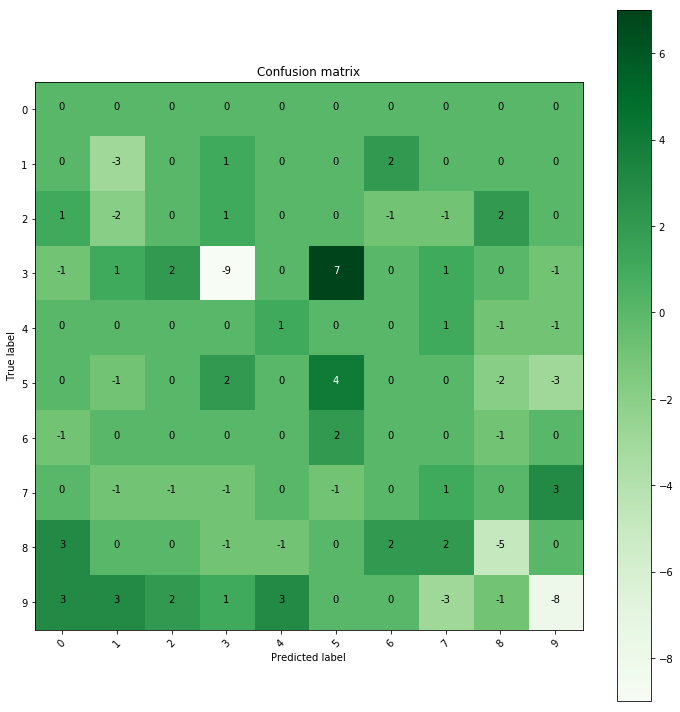

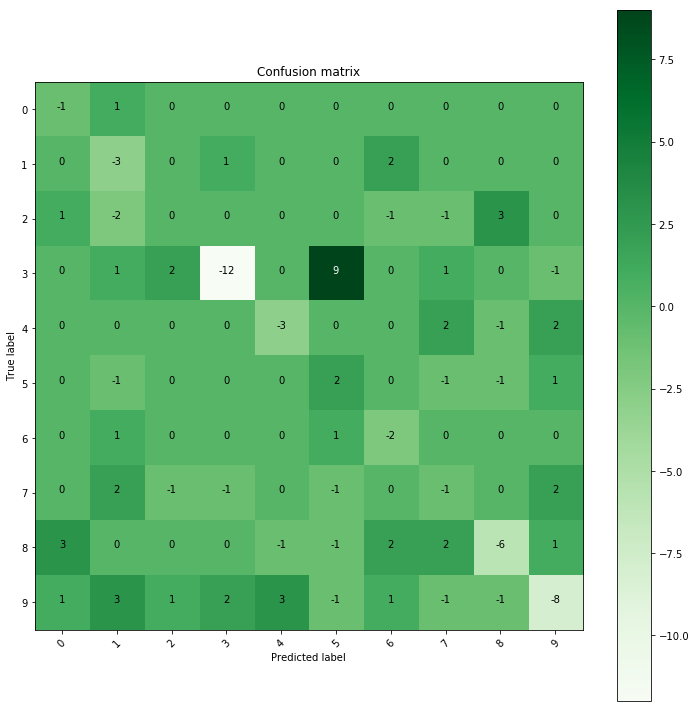

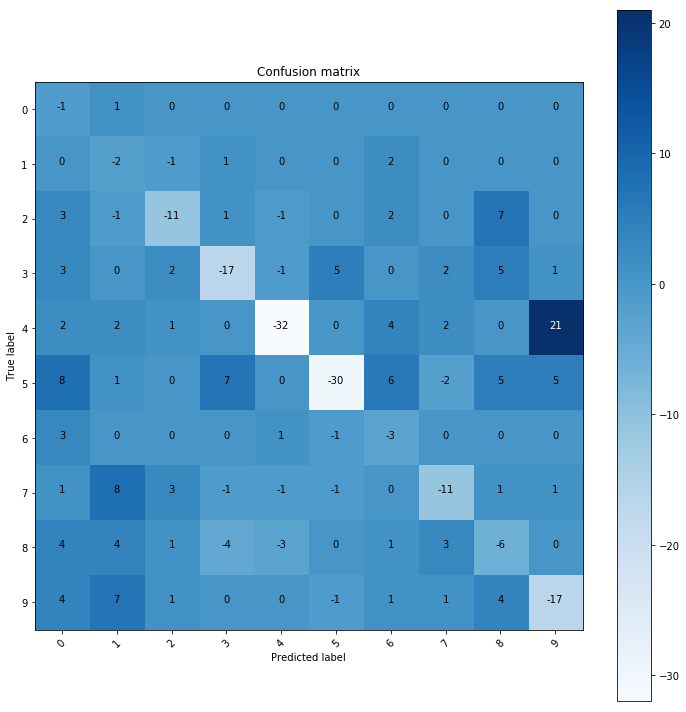

In [49]:
import skimage.transform as skt
import scipy.ndimage.interpolation as ndimage
import scipy.ndimage.filters as filt
from sklearn.metrics import confusion_matrix as cm
import plot_confusion_matrix as pcm
import matplotlib.pyplot as plt
rotate = 5
shift = 1
disp = 1 ** (1/2)
cl = My_KNN.KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
cl.fit(X_train, Y_train)
knn_dist, knn_ind = cl.find_kneighbors(X_test, return_distance=True)
for p in [rotate, -rotate]:
    X_new = np.array([skt.rotate(im.reshape(28,28), p).ravel() for im in X_test])
    knn_dist_tmp, knn_ind_tmp = cl.find_kneighbors(X_new, return_distance=True)
    knn_ind [knn_dist > knn_dist_tmp] = knn_ind_tmp[knn_dist > knn_dist_tmp]
    knn_dist[knn_dist > knn_dist_tmp] = knn_dist_tmp[knn_dist > knn_dist_tmp]
    del(X_new)
    del(knn_ind_tmp)
    del(knn_dist_tmp)
Y_pred = cl.predict_k(Y_train[knn_ind], knn_dist)    
my_cm_ar6 = cm(Y_test, Y_pred)
plt.figure(figsize=(10,10))
pcm.plot_confusion_matrix(my_cm-my_cm_ar6,np.unique(Y_test).astype(int),cmap=plt.cm.Greens)
plt.savefig("cm6_ar.pdf")
for p in [shift, -shift]:
    X_new = np.array([ndimage.shift(im.reshape(28,28), [p, 0]).ravel() for im in X_test])
    knn_dist_tmp, knn_ind_tmp = cl.find_kneighbors(X_new, return_distance=True)
    knn_ind [knn_dist > knn_dist_tmp] = knn_ind_tmp[knn_dist > knn_dist_tmp]
    knn_dist[knn_dist > knn_dist_tmp] = knn_dist_tmp[knn_dist > knn_dist_tmp]
    del(X_new)
    del(knn_ind_tmp)
    del(knn_dist_tmp)
for p in [shift, -shift]:
    X_new = np.array([ndimage.shift(im.reshape(28,28), [0, p]).ravel() for im in  X_test])
    knn_dist_tmp, knn_ind_tmp = cl.find_kneighbors(X_new, return_distance=True)
    knn_ind [knn_dist > knn_dist_tmp] = knn_ind_tmp[knn_dist > knn_dist_tmp]
    knn_dist[knn_dist > knn_dist_tmp] = knn_dist_tmp[knn_dist > knn_dist_tmp]
    del(X_new)
    del(knn_ind_tmp)
    del(knn_dist_tmp)

Y_pred = cl.predict_k(Y_train[knn_ind], knn_dist)    
my_cm_as6 = cm(Y_test, Y_pred)
plt.figure(figsize=(10,10))
pcm.plot_confusion_matrix(my_cm-my_cm_as6,np.unique(Y_test).astype(int),cmap=plt.cm.Greens)
plt.savefig("cm6_as.pdf")

total_acc = My_KNN.acc_scorer(Y_test, Y_pred)
print("Total accuracy:\n",total_acc)
my_cm1_6 = cm(Y_test, Y_pred)
plt.figure(figsize=(10,10))
pcm.plot_confusion_matrix(my_cm1 - my_cm1_6,np.unique(Y_test).astype(int))
plt.savefig("cm5-6.pdf")

Confusion matrix, without normalization
[[ -1   1   0   0   0   0   0   0   0   0]
 [  0  -3   0   1   0   0   2   0   0   0]
 [  1  -2   0   0   0   0  -1  -1   3   0]
 [  0   1   2 -12   0   9   0   1   0  -1]
 [  0   0   0   0  -3   0   0   2  -1   2]
 [  0  -1   0   0   0   2   0  -1  -1   1]
 [  0   1   0   0   0   1  -2   0   0   0]
 [  0   2  -1  -1   0  -1   0  -1   0   2]
 [  3   0   0   0  -1  -1   2   2  -6   1]
 [  1   3   1   2   3  -1   1  -1  -1  -8]]


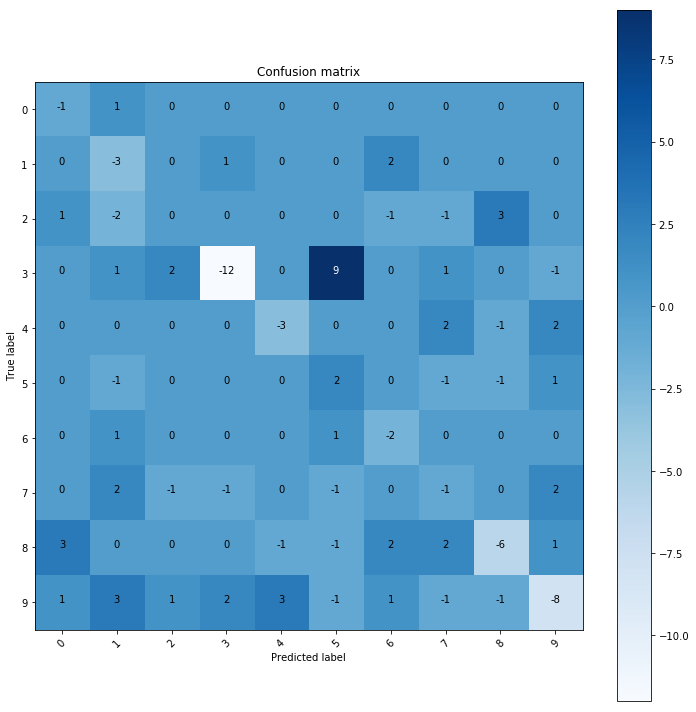

In [43]:
plt.figure(figsize=(10,10))
pcm.plot_confusion_matrix(my_cm - my_cm1_6,np.unique(Y_test).astype(int))
plt.savefig("cm4-6.pdf")